In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
data_main = pd.read_csv('IMDB Dataset.csv', sep=',')
data = data_main.sample(n = 5000)
data

,review,sentiment
215,This movie is without a doubt a perfect 10/10....,positive
24677,"Real cool, smart movie. I loved Sheedy's color...",positive
15424,Bangville Police supposedly marked the debut o...,negative
42708,This film was really terrible.<br /><br />Howe...,negative
21384,A group of forest rangers and scientists go in...,negative
...,...,...
6030,My evaluation: 8/10<br /><br />I like a lot th...,positive
48419,"When this movie first came out back in 1984, P...",positive
20522,From watching only the trailer to Theodore Rex...,negative
41036,Chaplin enters the trenches of WWI in this spi...,positive


## Cleaning the text

In [3]:
# Figuring out stop words, words that are not useful and are common in all the text documents
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
stop_words = stopwords.words('english')
stop_words += list(string.punctuation)
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [4]:
def cleaning_text(s):
    text_string = re.sub(r'[^a-zA-Z\s]', '', s, re.I|re.A).strip()
    token_string = word_tokenize(text_string)
    ps = PorterStemmer()
    token_string_stem = [ps.stem(w) for w in token_string if w not in stop_words]
    return ' '.join(token_string_stem)

In [5]:
import time
start_time = time.time()
data['review'] = data['review'].apply(cleaning_text)
end_time = time.time()
print('Time Taken = ', end_time-start_time, 'seconds')

Time Taken =  23.900984048843384 seconds


In [6]:
data['sentiment'] = data['sentiment'].apply(lambda s: int(s == 'positive'))
data

,review,sentiment
215,thi movi without doubt perfect peopl rate film...,1
24677,real cool smart movi I love sheedi color espec...,1
15424,bangvil polic supposedli mark debut keyston ko...,0
42708,thi film realli terriblebr br howev worth see ...,0
21384,A group forest ranger scientist go wood find f...,0
...,...,...
6030,My evalu br br I like lot movi compar today br...,1
48419,when movi first came back princ one hottest ac...,1
20522,from watch trailer theodor rex would think bad...,0
41036,chaplin enter trench wwi spirit comedi never b...,1


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [157]:
train, test = train_test_split(data, test_size=0.2, random_state = 0)
train

,review,sentiment
27106,thi film perfect exampl movi success high budg...,0
24117,again ive read comment post agre mani intellig...,1
30162,In follow dylan moran star charm misanthrop bo...,0
18695,thi great british film A cleverli observ scrip...,1
43181,did ever watch realli bad movi get mad even mo...,0
...,...,...
13643,spoiler abound you warnedbr br I thoroughli di...,0
9917,gargoyl start late one night romania peasant g...,0
29628,what offend critic follow film mention origin ...,0
13004,thi show realli great it smartit funnyit great...,1


In [158]:
test

,review,sentiment
39401,the undoubt highlight movi peter otool perform...,1
33778,veteran director produc allan dwan whose huge ...,0
22908,To understand crash cours right context must u...,1
32303,As documentari laughabl campi sort way schlock...,0
32007,thi disappoint film the peopl seem substanc le...,0
...,...,...
43674,thi movi stink the stench resembl bad cowpi sa...,0
19946,teen deviyaan great film A breezi entertain mo...,1
43769,I went see movi twice within week sum one word...,1
8281,thi sound like go like silenc lamb zodiac some...,0


In [159]:
cv = CountVectorizer(max_features = 2500)

In [160]:
train_mat = cv.fit_transform(train['review'].values)

In [161]:
test_mat = cv.transform(test['review'].values)

In [162]:
cv.get_feature_names()

['abandon',
 'abil',
 'abl',
 'about',
 'absolut',
 'absurd',
 'abus',
 'academi',
 'accent',
 'accept',
 'accid',
 'accident',
 'accompani',
 'accomplish',
 'accord',
 'account',
 'accur',
 'achiev',
 'across',
 'act',
 'action',
 'activ',
 'actor',
 'actress',
 'actual',
 'ad',
 'adam',
 'adapt',
 'add',
 'addict',
 'addit',
 'address',
 'admir',
 'admit',
 'ador',
 'adult',
 'advanc',
 'advantag',
 'adventur',
 'advic',
 'affair',
 'affect',
 'afraid',
 'africa',
 'after',
 'afternoon',
 'afterward',
 'again',
 'age',
 'agent',
 'ago',
 'agre',
 'ahead',
 'aid',
 'aim',
 'aint',
 'air',
 'aka',
 'al',
 'ala',
 'alan',
 'albeit',
 'alcohol',
 'alex',
 'alexand',
 'alic',
 'alien',
 'aliv',
 'all',
 'allbr',
 'allen',
 'allow',
 'almost',
 'alon',
 'along',
 'alreadi',
 'alright',
 'also',
 'alter',
 'altern',
 'although',
 'alway',
 'amateur',
 'amateurish',
 'amaz',
 'amazingli',
 'america',
 'american',
 'among',
 'amongst',
 'amount',
 'amus',
 'an',
 'ancient',
 'and',
 'anderson

## Training and Testing the data

### Weighted Sums

In [163]:
def ww_fit(train):
    word_sentiment = {}
    for index, row in train.iterrows():
        line ,sentiment = row['review'],row['sentiment']
        for word in line.split():
            try: # Increment weight of the word by 1 if positive, decrement weight by 1 if negative
                word_sentiment[word][0] = word_sentiment[word][0] + 1 if int(sentiment) == 1 else word_sentiment[word][0] - 1
            except: # If word doesn't exist, create new entry in dictionary
                word_sentiment[word] = [1, 0] if int(sentiment) == 1 else [-1, 0]
            finally: # Increment number of occurences of the word; used later to compute the weighted sum instead of just sum
                word_sentiment[word][1] += 1
    word_weighted_sentiment = {word: word_sentiment[word][0] / word_sentiment[word][1] for word in word_sentiment.keys()}
    # Weighted sum of the sentiment of each word (divide weight of the word by number of occurences of the word)
    return word_weighted_sentiment

In [164]:
def ww_predict(test, word_weighted_sentiment):
    ww_y_pred = []
    for data in test['review'].values:
        words = data.split()
        sentiment = 0
        for word in words:
            try:
                sentiment += word_weighted_sentiment[word] # Compute sum of weighted sentiments of the words in the review
            except:
                sentiment += 0 # MISSING WORDS (words in testing data but not training data) ARE GIVEN SENTIMENT OF 0
        if sentiment >= 0:
            ww_y_pred.append(1)
        else:
            ww_y_pred.append(0)
    return np.array(ww_y_pred)

In [165]:
ww_dict = ww_fit(train)

In [166]:
ww_y_pred = ww_predict(test,ww_dict)

In [167]:
print('Confusion Matrix :')
print(metrics.confusion_matrix(test['sentiment'].values, ww_y_pred, labels = [0, 1]))

Confusion Matrix :
[[400  86]
 [ 86 428]]


In [214]:
ww_accuracy = metrics.accuracy_score(test['sentiment'].values, ww_y_pred)
print('Accuracy Score',ww_accuracy)

Accuracy Score 0.828


In [169]:
ww_precision, ww_recall, ww_f, ww_support= metrics.precision_recall_fscore_support(test['sentiment'].values, ww_y_pred, average = 'binary',labels = [0, 1])
print('Precision', ww_precision)
print('Recall', ww_recall)
print('F Score', ww_f)

Precision 0.8326848249027238
Recall 0.8326848249027238
F Score 0.8326848249027237


### 'Multinomial' Naive Bayes

In [170]:
from sklearn.naive_bayes import MultinomialNB

In [171]:
NBClassifer = MultinomialNB()

In [172]:
NBClassifer.fit(train_mat, train['sentiment'].values)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [173]:
NB_y_pred = NBClassifer.predict(test_mat)

In [174]:
print('Confusion Matrix :')
print(metrics.confusion_matrix(test['sentiment'].values, NB_y_pred, labels = [0, 1]))

Confusion Matrix :
[[420  66]
 [ 96 418]]


In [213]:
NB_accuracy = metrics.accuracy_score(test['sentiment'].values, NB_y_pred)
print('Accuracy Score',NB_accuracy)

Accuracy Score 0.838


In [176]:
NB_precision, NB_recall, NB_f, NB_support= metrics.precision_recall_fscore_support(test['sentiment'].values, NB_y_pred, average = 'binary',labels = [0, 1])
print('Precision', NB_precision)
print('Recall', NB_recall)
print('F Score', NB_f)

Precision 0.8636363636363636
Recall 0.8132295719844358
F Score 0.837675350701403


### Support Vector Machine (SVM)

In [177]:
from sklearn.svm import SVC

In [178]:
SVClassifer = SVC(gamma = 'scale')

In [179]:
SVClassifer.fit(train_mat, train['sentiment'].values)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [180]:
SVC_y_pred = SVClassifer.predict(test_mat)

In [181]:
print('Confusion Matrix :')
print(metrics.confusion_matrix(test['sentiment'].values, SVC_y_pred, labels = [0, 1]))

Confusion Matrix :
[[399  87]
 [ 66 448]]


In [216]:
SVC_accuracy = metrics.accuracy_score(test['sentiment'].values, SVC_y_pred)
print('Accuracy Score',SVC_accuracy)

Accuracy Score 0.847


In [183]:
SVC_precision, SVC_recall, SVC_f, SVC_support= metrics.precision_recall_fscore_support(test['sentiment'].values, SVC_y_pred, average = 'binary',labels = [0, 1])
print('Precision', SVC_precision)
print('Recall', SVC_recall)
print('F Score', SVC_f)

Precision 0.8373831775700935
Recall 0.8715953307392996
F Score 0.8541468064823642


### K-Nearest Neighbour

In [184]:
from sklearn.neighbors import KNeighborsClassifier

In [185]:
KNNClassifier = KNeighborsClassifier()

In [186]:
KNNClassifier.fit(train_mat, train['sentiment'].values)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [187]:
KNN_y_pred = KNNClassifier.predict(test_mat)

In [188]:
print('Confusion Matrix :')
print(metrics.confusion_matrix(test['sentiment'].values, KNN_y_pred, labels = [0, 1]))

Confusion Matrix :
[[241 245]
 [129 385]]


In [212]:
KNN_accuracy = metrics.accuracy_score(test['sentiment'].values, KNN_y_pred)
print('Accuracy Score',KNN_accuracy)

Accuracy Score 0.626


In [190]:
KNN_precision, KNN_recall, KNN_f, KNN_support= metrics.precision_recall_fscore_support(test['sentiment'].values, KNN_y_pred, average = 'binary',labels = [0, 1])
print('Precision', KNN_precision)
print('Recall', KNN_recall)
print('F Score', KNN_f)

Precision 0.6111111111111112
Recall 0.7490272373540856
F Score 0.6730769230769231


### Logistic Regression

In [191]:
from sklearn.linear_model import LogisticRegression

In [199]:
LogClassifier = LogisticRegression(solver = 'sag')

In [200]:
LogClassifier.fit(train_mat, train['sentiment'].values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [201]:
Log_y_pred = LogClassifier.predict(test_mat)

In [203]:
print('Confusion Matrix :')
print(metrics.confusion_matrix(test['sentiment'].values, Log_y_pred, labels = [0, 1]))

Confusion Matrix :
[[421  65]
 [ 83 431]]


In [207]:
Log_accuracy = metrics.accuracy_score(test['sentiment'].values, Log_y_pred)
print('Accuracy Score',Log_accuracy)

Accuracy Score 0.852


In [204]:
Log_precision, Log_recall, Log_f, Log_support= metrics.precision_recall_fscore_support(test['sentiment'].values, Log_y_pred, average = 'binary', labels = [0, 1])
print('Precision', Log_precision)
print('Recall', Log_recall)
print('F Score', Log_f)

Precision 0.8689516129032258
Recall 0.8385214007782101
F Score 0.8534653465346534


## Graph to compare

In [205]:
import matplotlib.pyplot as plt

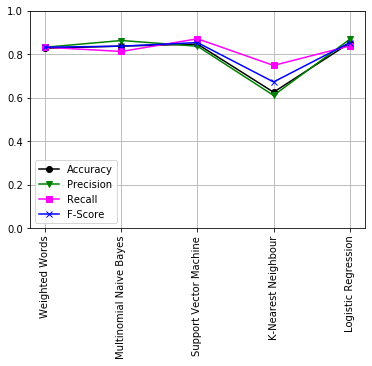

In [252]:
plt.plot(np.arange(1,6,1), [ww_accuracy,NB_accuracy,SVC_accuracy,KNN_accuracy,Log_accuracy], 
        color = 'k',marker='o',label = 'Accuracy')
plt.plot(np.arange(1,6,1), [ww_precision,NB_precision,SVC_precision,KNN_precision,Log_precision], 
        color = 'green',marker='v',label = 'Precision')
plt.plot(np.arange(1,6,1), [ww_recall,NB_recall,SVC_recall,KNN_recall,Log_recall], 
        color = 'magenta',marker='s',label = 'Recall')
plt.plot(np.arange(1,6,1), [ww_f,NB_f,SVC_f,KNN_f,Log_f], 
        color = 'blue',marker='x',label = 'F-Score')
plt.legend()
plt.grid()
plt.xticks(np.arange(1,6,1), ('Weighted Words', 'Multinomial Naive Bayes', 'Support Vector Machine', 'K-Nearest Neighbour', 'Logistic Regression'), rotation = 90)
plt.ylabel = 'Score'
plt.xlabel = 'Classifier'
plt.title = "Accuracy, Precision, Recall and F-Score"
plt.axis([0.8,5.2,0,1])
plt.show()